In [1]:
import _gan_keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from sklearn.decomposition import PCA
import copy
from scipy import stats
import random
random.seed(42)
from scipy.stats import kde



1.13.1


# Reading the data

In [2]:
input_ltpm_matrix = pd.read_csv('Engel.tsv', delimiter='\t')
input_ltpm_matrix = input_ltpm_matrix.iloc[:,1:]
input_ltpm_matrix = np.log2(input_ltpm_matrix+1)
input_ltpm_matrix = input_ltpm_matrix.T

varlist = input_ltpm_matrix.var(axis=0) 
varlist = sorted(range(len(varlist)), key=lambda i: varlist[i])[-5000:]
input_ltpm_matrix = input_ltpm_matrix.iloc[:,varlist]

input_ltpm_matrix_sampled = input_ltpm_matrix.sample(200)
input_ltpm_matrix_train = input_ltpm_matrix_sampled.iloc[0:200,:]
input_ltpm_matrix_validation = input_ltpm_matrix_train


In [3]:
input_ltpm_matrix.head()

,10747,4893,1337,6260,7088,11636,3824,1223,11445,7427,...,10582,1199,33938,6926,4015,35472,17414,15511,8247,34199
GSM1923445,0.0,0.00000,1.159804,2.584963,1.000000,9.252128,0.0,0.0,0.000000,0.000000,...,2.321928,2.584962,2.350777,3.000000,12.455463,1.055626,4.192399,2.321929,13.488719,11.110177
GSM1923446,0.0,1.00000,0.000000,2.584963,6.089875,2.751067,0.0,0.0,10.800091,1.584963,...,0.000000,10.208222,7.777505,11.189825,11.843674,0.756724,10.205109,10.617311,13.167104,10.200053
GSM1923447,0.0,0.00000,1.000000,3.459432,0.000000,3.238305,0.0,0.0,2.000000,0.000000,...,1.000000,0.000000,0.000000,11.063395,4.606857,0.001772,2.326858,2.807355,11.828533,2.807101
GSM1923448,0.0,0.00000,1.000000,11.008912,0.000000,1.614903,0.0,0.0,1.000000,0.000000,...,2.695295,11.112374,2.597974,11.425216,3.425745,0.001138,0.000000,3.807359,15.027085,1.584583
GSM1923449,0.0,5.83289,0.000000,3.321928,0.000000,4.351642,0.0,0.0,10.864962,0.000000,...,1.000000,11.160502,0.001735,11.182090,13.232767,1.031565,11.311487,10.709420,13.130088,11.080791


In [4]:
input_ltpm_matrix.shape

(203, 5000)

In [5]:
input_ltpm_matrix_sampled.shape

(200, 5000)

In [6]:
input_ltpm_matrix_train.shape

(200, 5000)

In [7]:
input_ltpm_matrix_validation.shape

(200, 5000)

# Filter the data if needed

# Train the weights on all the data

In [8]:
GAN_test = _gan_keras.GAN_keras(np.amax(input_ltpm_matrix_train.values), input_ltpm_matrix_train.shape[1], input_ltpm_matrix_train)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/paureel/.local/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


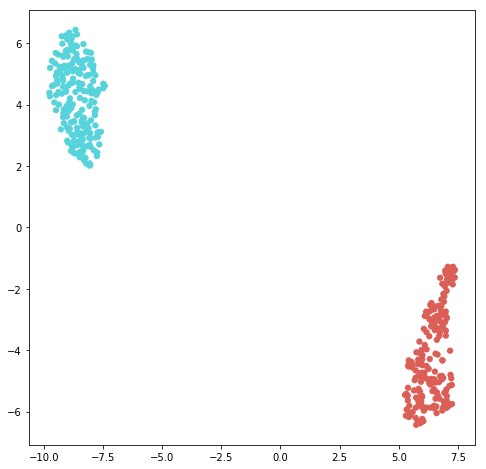

[array([ 6.3115253,  6.70972  ,  6.964168 ,  6.8388886,  5.8398147,
         6.852228 ,  7.3704257,  7.291812 ,  6.617024 ,  5.4782553,
         5.952455 ,  5.396868 ,  7.0138993,  6.6420226,  7.0548234,
         6.9909205,  6.5892377,  6.840531 ,  5.848496 ,  5.444573 ,
         7.219521 ,  6.001198 ,  6.612585 ,  7.2436543,  6.490931 ,
         5.7234178,  7.028429 ,  7.3180194,  5.422529 ,  6.7479815,
         5.8968434,  6.3345633,  6.1623325,  6.827125 ,  6.331377 ,
         5.265514 ,  5.8219314,  6.264816 ,  5.515659 ,  6.9490485,
         5.713445 ,  6.67035  ,  6.9003725,  6.5557375,  6.598536 ,
         5.564226 ,  6.722527 ,  5.872628 ,  7.081125 ,  7.1388264,
         5.8448462,  5.807316 ,  5.429136 ,  5.738388 ,  6.990658 ,
         5.54792  ,  6.5025377,  6.8605175,  6.15609  ,  7.0732665,
         5.574674 ,  7.176041 ,  6.743382 ,  5.984479 ,  6.4961133,
         7.025954 ,  6.8400784,  7.011554 ,  7.039335 ,  5.9382925,
         5.8968115,  7.0446677,  5.588324 ,  5.8

In [ ]:
GAN_test.plot_UMAP(200)

In [ ]:
GAN_test.train_all(250000)

0.0%
0.04%
0.08%
0.12%
0.16%
0.2%
0.24%
0.27999999999999997%
0.32%
0.36%
0.4%
0.44%
0.48%
0.52%
0.5599999999999999%
0.6%
0.64%
0.6799999999999999%
0.72%
0.76%
0.8%
0.84%
0.88%
0.9199999999999999%
0.96%
1.0%
1.04%
1.08%
1.1199999999999999%
1.16%
1.2%
1.24%
1.28%
1.32%
1.3599999999999999%
1.4000000000000001%
1.44%
1.48%
1.52%
1.5599999999999998%
1.6%
1.6400000000000001%
1.68%
1.72%
1.76%
1.7999999999999998%
1.8399999999999999%
1.8800000000000001%
1.92%
1.96%
2.0%
2.04%
2.08%
2.12%
2.16%
2.1999999999999997%
2.2399999999999998%
2.2800000000000002%
2.32%
2.36%
2.4%
2.44%
2.48%
2.52%
2.56%
2.6%
2.64%
2.68%
2.7199999999999998%
2.76%
2.8000000000000003%
2.8400000000000003%
2.88%
2.92%
2.96%
3.0%
3.04%
3.08%
3.1199999999999997%
3.16%
3.2%
3.2399999999999998%
3.2800000000000002%
3.32%
3.36%
3.4000000000000004%
3.44%
3.4799999999999995%
3.52%
3.56%
3.5999999999999996%
3.64%
3.6799999999999997%
3.7199999999999998%
3.7600000000000002%
3.8%
3.84%
3.88%
3.92%
3.9600000000000004%
4.0%
4.04%
4.08%
4.12

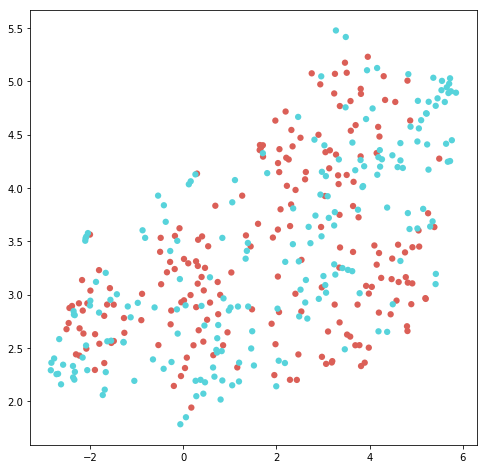

In [13]:
embedding_list = GAN_test.plot_UMAP(200)

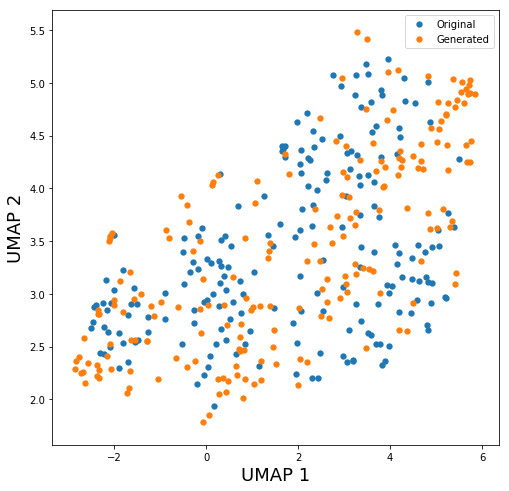

In [14]:
colors = embedding_list[2]
palette = np.array(sns.color_palette("hls", 2))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
scatter1 = ax.scatter(embedding_list[0][np.where(colors == 0)], 
                      embedding_list[1][np.where(colors == 0)], lw=0, s=40, label='Original')
scatter2 = ax.scatter(embedding_list[0][np.where(colors == 1)], 
                      embedding_list[1][np.where(colors == 1)], lw=0, s=40, label='Generated')


plt.xlim(-25, 25)
plt.ylim(-25, 25)

plt.xlabel('UMAP 1', fontsize=18)
plt.ylabel('UMAP 2', fontsize=18)
ax.axis('tight')
plt.legend(handles=[scatter1, scatter2])
plt.show()
#legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)


In [15]:
generated_df = GAN_test.draw_cells(200)

In [16]:
pd.DataFrame(embedding_list).T.to_csv('emb_list.csv', index=False)
input_ltpm_matrix_train.to_csv('train.csv', index=False)
input_ltpm_matrix_validation.to_csv('validation.csv', index=False)
generated_df.to_csv('generated.csv', index=False)

In [17]:
input_ltpm_matrix_train.shape

(200, 5000)

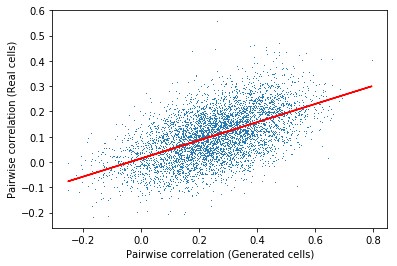

In [18]:
corel_list = []
corel_list_gen = []

tocor = generated_df.sample(100, axis=1)
tocor_orig = pd.DataFrame(input_ltpm_matrix_validation).iloc[:,tocor.columns]

for x in tocor_orig.columns:
    for y in tocor_orig.columns:
        if x != y:
            corr = stats.pearsonr(tocor_orig[x],tocor_orig[y])
            corel_list.append(corr[0])
for x in tocor.columns:
    for y in tocor.columns:
        if x != y:
            corr = stats.pearsonr(tocor[x],tocor[y])
            corel_list_gen.append(corr[0])

X = np.array(corel_list_gen)
Y = np.array(corel_list)
mask = ~np.isnan(X) & ~np.isnan(Y)
X = X[mask]
Y = Y[mask]
xbar = sum(X)/len(X)
ybar = sum(Y)/len(Y)
n = len(X) # or len(Y)

numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
denum = sum([xi**2 for xi in X]) - n * xbar**2

b = numer / denum
a = ybar - b * xbar


# plot points and fit line

#plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]


plt.scatter(corel_list_gen, corel_list,lw=0, s=1)
#plt.scatter(corel_list_gen, np.poly1d(np.polyfit(corel_list_gen, corel_list, 1))(corel_list_gen))
plt.plot(X, yfit, c = 'red')
plt.xlabel('Pairwise correlation (Generated cells)', fontsize=10)
plt.ylabel('Pairwise correlation (Real cells)', fontsize=10)
ax.axis('tight')

plt.show()

In [19]:
stats.pearsonr(X,Y)





(0.5464682131525227, 0.0)

# Interpolation

In [ ]:
def plot_start(test1, test2, df_filtered, df_filtered_start, df_filtered_end):
    gencell = GAN_test.draw_cells_with_seed(test1)
    gencell = gencell.append(GAN_test.draw_cells_with_seed(test2), ignore_index=True)
    gencell['lab'] = 2

    df_interp_orig = copy.deepcopy(df_filtered)
    df_1 =  df_filtered_start.reset_index(drop=True).iloc[df_filtered_start.reset_index(drop=True).index==1]
    df_2 = df_filtered_end.reset_index(drop=True).iloc[df_filtered_end.reset_index(drop=True).index==1]
    df_3 = df_1.append(df_2,ignore_index=True)
    df_3 = df_3.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df_3['lab'] = 1
    df_interp_orig = df_interp_orig.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df_interp_orig['lab'] = 0
    df_new = df_interp_orig.append(df_3,ignore_index=True)

    df_new = df_new.append(gencell,ignore_index=True)

    pca = PCA(n_components=100)
    data_pca = pca.fit_transform(df_new.loc[:, df_new.columns != 'lab'])
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data_pca)
    colors = df_new.loc[:,'lab']
    palette = np.array(sns.color_palette("hls", 3))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40,c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    ax.axis('tight')
    plt.show()

In [ ]:
def plot_interp(interpolated, df_filtered):
    
    df = copy.deepcopy(interpolated.reset_index(drop=True))
    df_orig = copy.deepcopy(df_filtered.loc[:, df_filtered.columns != 'lab'])
    df_orig = df_orig.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df = df.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df = df.assign(lab = 1)
    df_orig = df_orig.assign(lab = 0)
    df_new = df_orig.append(df, ignore_index=True)

    pca = PCA(n_components=100)
    data_pca = pca.fit_transform(df_orig.loc[:, df_orig.columns != 'lab'])
    
    data_pca_tr = pca.transform(df.loc[:, df.columns != 'lab'])
    
    reducer = umap.UMAP()
    
    embedding = reducer.fit_transform(data_pca)
    embedding_tr = reducer.transform(data_pca_tr)
    
    embedding_final = np.concatenate((embedding, embedding_tr), axis=0)
    
    colors = df_new.loc[:,'lab']
    palette = np.array(sns.color_palette("hls", 2))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(embedding_final[:,0], embedding_final[:,1], lw=0, s=40,c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    ax.axis('tight')
    plt.show()

In [ ]:
def plot_interp_gene(interpolated, df_filtered):
    
    df = copy.deepcopy(interpolated.reset_index(drop=True))
    df_orig = copy.deepcopy(df_filtered.loc[:, df_filtered.columns != 'lab'])
    df_orig = df_orig.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df = df.T.reset_index().T.reset_index(drop=True).iloc[1:]
    df = df.assign(lab = 1)
    df_orig = df_orig.assign(lab = 0)
    df_new = df_orig.append(df, ignore_index=True)

    
    colors = df_new.loc[:,'lab']
    palette = np.array(sns.color_palette("hls", 2))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(df_new.iloc[:,80], df_new.iloc[:,55], lw=0, s=40,c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    ax.axis('tight')
    plt.show()

In [ ]:
df_1 =  copy.deepcopy(df_filtered_start.reset_index(drop=True).iloc[df_filtered_start.reset_index(drop=True).index==1])
df_2 = copy.deepcopy(df_filtered_end.reset_index(drop=True).iloc[df_filtered_end.reset_index(drop=True).index==1])
    
test1 = GAN_test.recover_latentrep(df_1.values[0], 100000)
test2 = GAN_test.recover_latentrep(df_2.values[0], 100000)



In [ ]:
test1_pd = pd.DataFrame(test1).T
test2_pd = pd.DataFrame(test2).T

In [ ]:
np.abs(df_1-df_2).max(axis=1)

In [ ]:
np.abs(test1_pd-test2_pd).max(axis=1)

In [ ]:
np.abs(df_1-df_2).apply(lambda x: pd.Series(np.concatenate([x.nlargest(2).index.values])), axis=1)


In [ ]:
np.abs(test1_pd-test2_pd).apply(lambda x: pd.Series(np.concatenate([x.nlargest(2).index.values])), axis=1)

In [ ]:
plot_start(test1, test2, df_filtered)

In [ ]:
for index in range(100):
    interpolated = GAN_test.interpolate_cells(test1, test2, index)
    plot_interp(interpolated, df_filtered)

# Style transfer

In [ ]:
#df_all = copy.deepcopy(input_ltpm_matrix)
#df_all['labels'] = input_ltpm_matrix_labs
#df_all['states'] = input_ltpm_matrix_states
#pertvec = GAN_test.train_pertvec(input_ltpm_matrix,input_ltpm_matrix_labs, input_ltpm_matrix_states,10000, 10, 10000)



In [ ]:
pert_vecs_mean = []

for index in range(6):
    print(index)
    pert_vecs_raw = {}
    sample_count = 50
    num_count = 10000

    df_transfer = copy.deepcopy(df_style)
    df_transfer['labels'] = labs_filt
    df_transfer['states'] = states_filt

    df_transfer = df_transfer[(df_transfer['labels']==index)]
    df_transfer_start = df_transfer[(df_transfer['states']==0)]
    df_transfer_end = df_transfer[(df_transfer['states']==1)]
    df_transfer_start = df_transfer_start.drop('labels', 1)
    df_transfer_start = df_transfer_start.drop('states', 1)
    df_transfer_end = df_transfer_end.drop('labels', 1)
    df_transfer_end = df_transfer_end.drop('states', 1)

    i = 0
    for index in range(10): # do it with random sampling

        if i % 1 == 0:
            print(str((i/sample_count)*100) + '%')
        i += 1
        startvec = df_transfer_start.iloc[index,:]
        endvec = df_transfer_end.iloc[index,:]

        start_noise = GAN_test.recover_latentrep(startvec, num_count)
        end_noise = GAN_test.recover_latentrep(endvec, num_count)

        pert_vecs_raw[index] =  end_noise - start_noise

    pert_vecs_mean.append(pd.DataFrame(pert_vecs_raw).median(axis=1))


In [ ]:
agg_means = pd.DataFrame(pert_vecs_mean).T.median(axis=1)

In [ ]:
#sns.pairplot(pd.DataFrame(pert_vecs_mean).T)

In [ ]:
true_starters = []
sim_ends = []
alpha_factor = 5
for j in range(50):
    labels_to_test = 6
    df_style_test = copy.deepcopy(df_style)
    df_style_test['labels'] = labs_filt
    df_style_test['states'] = states_filt

    df_style_test = df_style_test[(df_style_test['labels']==labels_to_test)]
    df_style_test_start = df_style_test[(df_style_test['states']==0)]
    df_style_test_end = df_style_test[(df_style_test['states']==1)]

    df_style_test = df_style_test.drop('labels', 1)
    df_style_test = df_style_test.drop('states', 1)
    df_style_test_start = df_style_test_start.drop('labels', 1)
    df_style_test_start = df_style_test_start.drop('states', 1)
    df_style_test_end = df_style_test_end.drop('labels', 1)
    df_style_test_end = df_style_test_end.drop('states', 1)

    df_1 =  copy.deepcopy(df_style_test_start.reset_index(drop=True).iloc[df_style_test_start.reset_index(drop=True).index==j])
    df_2 = copy.deepcopy(df_style_test_end.reset_index(drop=True).iloc[df_style_test_end.reset_index(drop=True).index==j])


    test1 = GAN_test.recover_latentrep(df_1.values[0], 100000)
    true_starters.append(df_1.values[0])
    test2 = np.array(test1 + alpha_factor * agg_means)
    sim_ends.append(GAN_test.draw_cells_with_seed(test2))
    print(j)
    #plot_start(test1, test2, df_style, df_style_test_start, df_style_test_end)

In [ ]:
true_starters

In [ ]:
plot_start(test1, test2, df_style, df_style_test_start, df_style_test_end)


In [ ]:
df_filtered_oob = copy.deepcopy(input_ltpm_matrix)
df_filtered_oob['labels'] = input_ltpm_matrix_labs
df_filtered_oob['states'] = input_ltpm_matrix_states

df_filtered_oob = df_filtered_oob[(df_filtered_oob['labels']==6)]
df_filtered_start_oob = df_filtered_oob[(df_filtered_oob['states']==0)]
df_filtered_end_oob = df_filtered_oob[(df_filtered_oob['states']==1)]

df_filtered_oob = df_filtered_oob.drop('labels', 1)
df_filtered_oob = df_filtered_oob.drop('states', 1)
df_filtered_start_oob = df_filtered_start_oob.drop('labels', 1)
df_filtered_start_oob = df_filtered_start_oob.drop('states', 1)
df_filtered_end_oob = df_filtered_end_oob.drop('labels', 1)
df_filtered_end_oob = df_filtered_end_oob.drop('states', 1)


In [ ]:
simdatadf = pd.DataFrame(sim_ends[0])
for index in range(len(sim_ends)-1):
    simdatadf=simdatadf.append(sim_ends[index+1])

oob = copy.deepcopy(df_filtered_oob)
true_starters_pd = pd.DataFrame(true_starters)
sim_ends_pd = pd.DataFrame(simdatadf)
oob = oob.T.reset_index().T.reset_index(drop=True).iloc[1:]
oob = oob.assign(lab = 0)
true_starters_pd = true_starters_pd.assign(lab = 1)
sim_ends_pd = sim_ends_pd.assign(lab = 2)

oob_all = copy.deepcopy(oob)
oob_all = oob_all.append(true_starters_pd)
oob_all = oob_all.append(sim_ends_pd)

generated_oob = true_starters_pd.append(sim_ends_pd, ignore_index=True)


pca = PCA(n_components=100)
data_pca = pca.fit_transform(oob.loc[:, oob.columns != 'lab'])
data_pca_gen = pca.transform(generated_oob.loc[:, generated_oob.columns != 'lab'])
#data_pca_tr = pca.transform(df.loc[:, df.columns != 'lab'])

#data_pca_tr = pca.transform(true_starters_pd)

reducer = umap.UMAP()

embedding = reducer.fit_transform(data_pca)
embedding_gen = reducer.transform(data_pca_gen)

embedding = np.concatenate((embedding, embedding_gen), axis=0)

embedding_tr = copy.deepcopy(pd.DataFrame(embedding))
embedding_tr['lab'] = oob_all.lab.reset_index(drop=True)

embedding_tr_start = embedding_tr[(embedding_tr['lab']==1)]
embedding_tr_end = embedding_tr[(embedding_tr['lab']==2)]
#embedding_tr = reducer.transform(data_pca_tr)

#embedding_final = np.concatenate((embedding, embedding_tr), axis=0)

colors = oob_all.loc[:,'lab']
palette = np.array(sns.color_palette("hls", 3))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40,c=palette[colors.astype(np.int)])
for index in range(len(embedding_tr_start)):
    plt.arrow(embedding_tr_start.iloc[index,0], embedding_tr_start.iloc[index,1], 
                  embedding_tr_end.iloc[index,0] - embedding_tr_start.iloc[index,0], 
              embedding_tr_end.iloc[index,1] - embedding_tr_start.iloc[index,1]
                 )

#sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

ax.axis('tight')
plt.show()

In [ ]:
simdatadf = pd.DataFrame(sim_ends[0])
for index in range(len(sim_ends)-1):
    simdatadf=simdatadf.append(sim_ends[index+1])

oob = copy.deepcopy(input_ltpm_matrix)
true_starters_pd = pd.DataFrame(true_starters)
sim_ends_pd = pd.DataFrame(simdatadf)
oob = oob.T.reset_index().T.reset_index(drop=True).iloc[1:]
oob = oob.assign(lab = 0)
true_starters_pd = true_starters_pd.assign(lab = 1)
sim_ends_pd = sim_ends_pd.assign(lab = 2)

oob_all = copy.deepcopy(oob)
oob_all = oob_all.append(true_starters_pd)
oob_all = oob_all.append(sim_ends_pd)

generated_oob = true_starters_pd.append(sim_ends_pd, ignore_index=True)


pca = PCA(n_components=100)
data_pca = pca.fit_transform(oob.loc[:, oob.columns != 'lab'])
data_pca_gen = pca.transform(generated_oob.loc[:, generated_oob.columns != 'lab'])
#data_pca_tr = pca.transform(df.loc[:, df.columns != 'lab'])

#data_pca_tr = pca.transform(true_starters_pd)

reducer = umap.UMAP()

embedding = reducer.fit_transform(data_pca)
embedding_gen = reducer.transform(data_pca_gen)

embedding = np.concatenate((embedding, embedding_gen), axis=0)

embedding_tr = copy.deepcopy(pd.DataFrame(embedding))
embedding_tr['lab'] = oob_all.lab.reset_index(drop=True)

embedding_tr_start = embedding_tr[(embedding_tr['lab']==1)]
embedding_tr_end = embedding_tr[(embedding_tr['lab']==2)]
#embedding_tr = reducer.transform(data_pca_tr)

#embedding_final = np.concatenate((embedding, embedding_tr), axis=0)

colors = oob_all.loc[:,'lab']
palette = np.array(sns.color_palette("hls", 3))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40,c=palette[colors.astype(np.int)])
for index in range(len(embedding_tr_start)):
    plt.arrow(embedding_tr_start.iloc[index,0], embedding_tr_start.iloc[index,1], 
                  embedding_tr_end.iloc[index,0] - embedding_tr_start.iloc[index,0], 
              embedding_tr_end.iloc[index,1] - embedding_tr_start.iloc[index,1]
                 )

#sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

ax.axis('tight')
plt.show()

In [ ]:
df_style = copy.deepcopy(input_ltpm_matrix)
df_style['labels'] = copy.deepcopy(input_ltpm_matrix_labs)
df_style['states'] = copy.deepcopy(input_ltpm_matrix_states)

df_style['id'] = df_style.labels.map(str) + "" + df_style.states.map(str)
df_style = df_style.drop('labels', 1)
df_style = df_style.drop('states', 1)
#df_style = df_style[(df_style['id']!='61')]

mean_dict_stats = {}
for index in np.unique(df_style['id']):
    df_style_temp =  copy.deepcopy(df_style[(df_style['id']==index)])
    mean_dict_stats[index] = df_style_temp.mean(axis=0)
#df_style = df_style.drop('id', 1)
mean_dict_stats = pd.DataFrame(mean_dict_stats).T.reset_index(drop = True)
mean_dict_stats = mean_dict_stats.drop('id', 1)


In [ ]:
sim_ends_pd_stats = copy.deepcopy(sim_ends_pd).drop('lab', 1).mean(axis=0)
mean_dict_stats = mean_dict_stats.T.reset_index().T.reset_index(drop=True).iloc[1:]
mean_dict_stats = mean_dict_stats.append(sim_ends_pd_stats,ignore_index=True)
reqd_cols = mean_dict_stats.columns
mean_dict_stats[reqd_cols] = mean_dict_stats[reqd_cols].astype('float64')

In [ ]:
mean_dict_stats.T

In [ ]:
sns.pairplot(mean_dict_stats.T)

In [ ]:
corr_stat_ids = np.concatenate(np.unique(df_style['id']), ['gen'])

In [ ]:
np.unique(df_style['id'])

In [ ]:
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in mean_dict_stats.T.columns:
    for y in mean_dict_stats.T.columns:
        corr = stats.pearsonr(mean_dict_stats.T[x], mean_dict_stats.T[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [ ]:
plt.pcolor(df_corr)
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns)
plt.show()

In [ ]:
oob = copy.deepcopy(df_filtered_start_oob)
oob2 = copy.deepcopy(df_filtered_end_oob)

oob = oob.assign(lab = 0)

oob2 = oob2.assign(lab = 1)

oob = oob.append(oob2, ignore_index=True)


pca = PCA(n_components=100)
data_pca = pca.fit_transform(oob.loc[:, oob.columns != 'lab'])
#data_pca_tr = pca.transform(df.loc[:, df.columns != 'lab'])

#data_pca_tr = pca.transform(true_starters_pd)

reducer = umap.UMAP()

embedding = reducer.fit_transform(data_pca)
#embedding_tr = reducer.transform(data_pca_tr)

#embedding_final = np.concatenate((embedding, embedding_tr), axis=0)

colors = oob.loc[:,'lab']
palette = np.array(sns.color_palette("hls", 2))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40,c=palette[colors.astype(np.int)])
#sc = ax.scatter(embedding[:,0], embedding[:,1], lw=0, s=40)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

ax.axis('tight')
plt.show()

In [ ]:
sns.palplot(sns.color_palette("hls", 3))


In [ ]:
pd.DataFrame(sim_ends)


# vsa